## <font color=RoyalBlue size=6>LIVRO: DATA SCIENCE DO ZERO</font>

***

#### <font color=CornflowerBlue size=5>Autor: Joel Grus | Editora: Alta Books</font>

***

#### <font color=CornflowerBlue size=4>Repositório oficial do autor: https://github.com/joelgrus/data-science-from-scratch </font>

***



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### <font color=SlateBlue size=5>CAPÍTULO 01 - INTRODUÇÃO </font>

***



In [2]:
users = [{"id":0,"name":"Hero"},
{"id":1,"name":"Dunn"},
{"id":2,"name":"Sue"},
{"id":3,"name":"Chi"},
{"id":4,"name":"Thor"},
{"id":5,"name":"Clive"},
{"id":6,"name":"Hicks"},
{"id":7,"name":"Devin"},
{"id":8,"name":"Kate"},
{"id":9,"name":"Klein"}   
]

friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
               (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

In [3]:
for user in users:
    user["friends"] = []
    
user  

{'id': 9, 'name': 'Klein', 'friends': []}

In [4]:
for i,j in friendships:
    users[i]["friends"].append(j)    #adiciona i como um amigo de j 
    users[j]["friends"].append(i)    #adiciona j como um amigo de i
    
users    

[{'id': 0, 'name': 'Hero', 'friends': [1, 2]},
 {'id': 1, 'name': 'Dunn', 'friends': [0, 2, 3]},
 {'id': 2, 'name': 'Sue', 'friends': [0, 1, 3]},
 {'id': 3, 'name': 'Chi', 'friends': [1, 2, 4]},
 {'id': 4, 'name': 'Thor', 'friends': [3, 5]},
 {'id': 5, 'name': 'Clive', 'friends': [4, 6, 7]},
 {'id': 6, 'name': 'Hicks', 'friends': [5, 8]},
 {'id': 7, 'name': 'Devin', 'friends': [5, 8]},
 {'id': 8, 'name': 'Kate', 'friends': [6, 7, 9]},
 {'id': 9, 'name': 'Klein', 'friends': [8]}]

In [5]:
def number_of_friends(users):
    return len(users['friends'])

total_connections_list = []

for u in users:
    total_connections_list.append(sum([number_of_friends(u)]))
    
total_connections = sum(total_connections_list)
total_connections


num_users = len(users)
avg_connections = total_connections / num_users
print(f' total_connections: {total_connections}, num_users: {num_users}, avg_connections: {avg_connections}')

 total_connections: 24, num_users: 10, avg_connections: 2.4


In [6]:
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]
sorted(num_friends_by_id, key=lambda userid_numfriends: userid_numfriends[1], reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

## Cientistas de dados que talvez você conheça

In [7]:
## Amigos de amigos

def friends_of_friend_ids_bad(user):
    return [foaf['id']
            for friend in user['friends']
            for foaf in friend['friends']]

In [8]:
documents = {'Vehicle' : 10,
              'fances' : 5,
              'driveway' : 3,
              'burglary' : 4    
}


word_counts = {}
for word in documents:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

## Salários e Experiência

In [9]:
salaries_and_teanures = [ (83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

salaries_and_teanures

[(83000, 8.7),
 (88000, 8.1),
 (48000, 0.7),
 (76000, 6),
 (69000, 6.5),
 (76000, 7.5),
 (60000, 2.5),
 (83000, 10),
 (48000, 1.9),
 (63000, 4.2)]

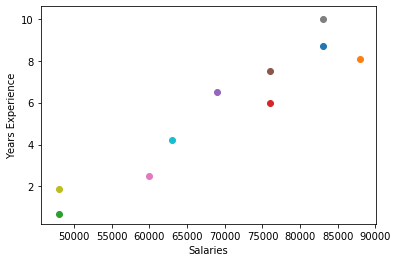

In [10]:
import matplotlib.pyplot as plt

for t, s in salaries_and_teanures:
    plt.scatter(t, s)
    plt.xlabel('Salaries')
    plt.ylabel('Years Experience')

In [11]:
from collections import defaultdict

salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_teanures:
    salary_by_tenure[tenure].append(salary)
    
average_salary_by_tenure = {tenure: sum(salaries) / len(salaries)
                            for tenure, salaries in salary_by_tenure.items()}

average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [12]:
def tenure_bucket(tenure):
    if tenure < 2:
        return 'Less than two'
    elif tenure < 5:
        return 'Between two and five'
    else:
        return 'More than five'

In [13]:
from collections import defaultdict

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_teanures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()}

### DefaultDict

In [14]:
from collections import defaultdict

dict2 = defaultdict(list)

dict2[2]

[]

## Contas Pagas

In [15]:
df_contas = { 'years_experience' : [0.7, 1.9, 2.5, 4.2, 6, 6.5, 7.5, 8.1, 8.7, 10],
      'status' : ['paid', 'unpaid', 'paid', 'unpaid', 'unpaid', 'unpaid', 'unpaid', 'unpaid', 'paid', 'paid']}

df_contas = pd.DataFrame(df_contas)
df_contas

,years_experience,status
0,0.7,paid
1,1.9,unpaid
2,2.5,paid
3,4.2,unpaid
4,6.0,unpaid
5,6.5,unpaid
6,7.5,unpaid
7,8.1,unpaid
8,8.7,paid
9,10.0,paid


In [16]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return 'paid'
    elif years_experience < 8.5:
        return 'unpaid'
    else:
        return 'paid'

## Tópicos de interesse

In [17]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [18]:
from collections import Counter

words_and_counts = Counter(word 
                           for user, interest in interests 
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


#### <font color=SlateBlue size=5>CAPÍTULO 02 - CURSO RELÂMPAGO DE PYTHON </font>

***



As pessoas ainda são loucas pelo Python mesmo depois de vinte e cinco anos, o que é difícil de acreditar
                                                              - Michael Palin

#### <font color=SlateBlue size=5>CAPÍTULO 03 - VISUALIZANDO DADOS </font>

***



Acredito que a visualização seja um dos meios mais poderosos de atingir metas pessoais. —Harvey Mackay

         Grus, Joel. Data Science do Zero (p. 58). Alta Books. Edição do Kindle.
               
***



#### <font color=CornflowerBlue size=4>MATPLOTLIB </font>

***



In [19]:
from matplotlib import pyplot as plt

In [20]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

Text(0.5, 0, 'Bilhões de $')

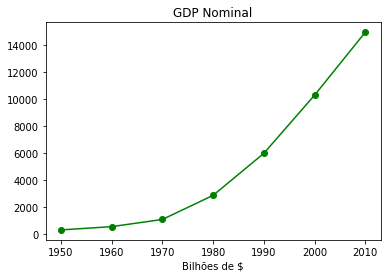

In [21]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title('GDP Nominal')
plt.xlabel('Bilhões de $')

#### <font color=CornflowerBlue size=4>Gráfico de Barra </font>

***



In [22]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

Text(0, 0.5, 'Premiações')

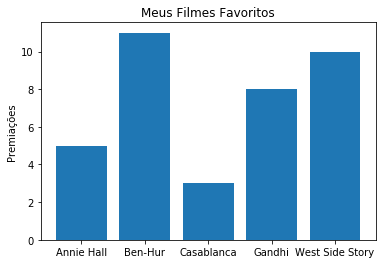

In [23]:
plt.bar(movies, num_oscars)
plt.title('Meus Filmes Favoritos')
plt.ylabel('Premiações')

#### <font color=CornflowerBlue size=4>Histograma </font>

***



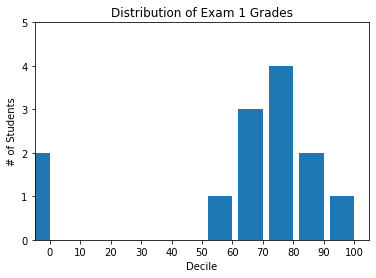

In [24]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(),                # give each bar its correct height
        8)                                 # give each bar a width of 8
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()


#### <font color=CornflowerBlue size=5>Histograma II (Não faz parte do livro)</font>

***


Documentação:

matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)[source]¶

(array([2., 0., 0., 0., 0., 0., 1., 3., 4., 3.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

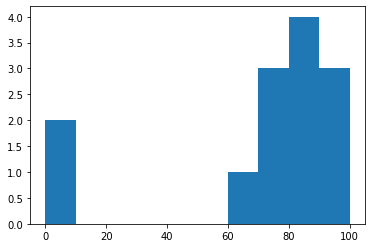

In [25]:
##Histograma construido a partir da lista acima

plt.hist(x = grades)

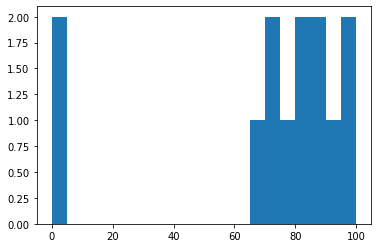

In [26]:
##Histograma construido a partir da lista acima
## Bins == Basicamente, trata da quantidade de colunas na plotagem. Quanto maior o número, menos agrupado o histograma ficará

ax = plt.hist(x = grades, bins = 20)
ax = ax 

#### <font color=CornflowerBlue size=5>Gráfico de Barras (eixo x não iniciando 0)</font>

***


Text(0, 0.5, '# de vezes que ouvimos alguem dizer "Data Science"')

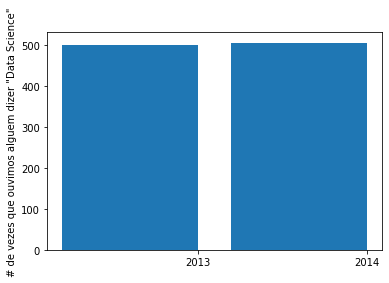

In [27]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel('# de vezes que ouvimos alguem dizer "Data Science"')

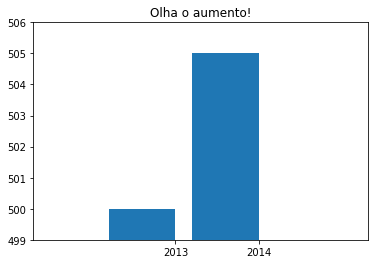

In [28]:
## Enganando o eixo X (Y mostra apenas a partir de 499)

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.axis([2011.30, 2015.3, 499, 506]) ##os valores foram alterados, pois os valores iguais aos do livro,
                                    ## deixava a barra "grudada" no eixo Y
plt.title('Olha o aumento!')
plt.show()

#### O mesmo gráfico, porém sem um eixo "enganador"

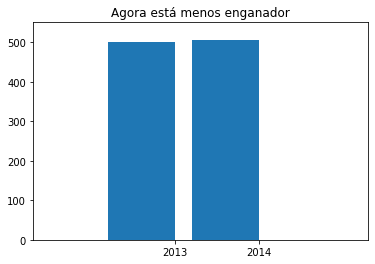

In [29]:

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.axis([2011.30, 2015.3, 0, 550]) ## 0 == eixo Y inicia no 0 // 550 == eixo Y vai ate 550
plt.title('Agora está menos enganador')
plt.show()

#### <font color=CornflowerBlue size=5>Gráfico de Linhas </font>

***


Text(0.5, 1.0, 'Compromisso entre Polarização e Variância')

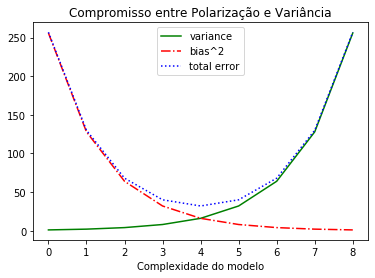

In [30]:
## Plotagem do grafico de linhas de acordo com o livro

variance = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]

xs = range(len(variance))

plt.plot(xs, variance,     'g-',  label='variance')    # Linha verde sólida
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # Linha vermelha tracejada
plt.plot(xs, total_error,  'b:',  label='total error') # Linha azul pontilhada

plt.legend(loc=9) ## Posicao da legenda
plt.xlabel('Complexidade do modelo') ##titulo do eixo X
plt.title('Compromisso entre Polarização e Variância') ## Titulo do grafico

#### Exemplo II de gráfico de linhas (Não está no livro)

Documentação:

matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)[source]

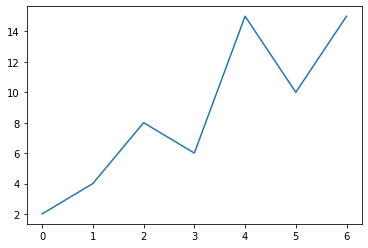

In [31]:
## Plotar grafico de linha simples
## Somente com uma linha

x = [2, 4, 8, 6, 15, 10, 15,]

plt.plot(x)

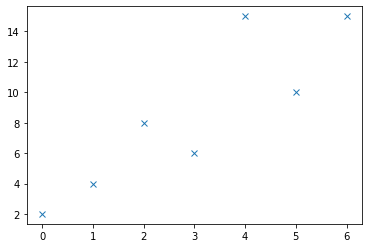

In [32]:
## Ao inves de linhas, "X" (ou algum outro caractere)

plt.plot(x, 'x')

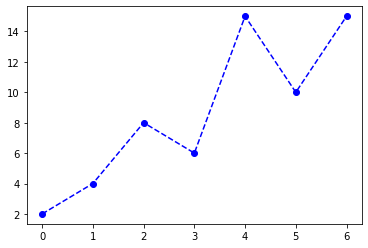

In [33]:
## Ao inves de linhas, "X" (ou algum outro caractere)

plt.plot(x, c = 'blue', marker = 'o', linestyle = '--')

#### <font color=CornflowerBlue size=5>Gráfico de Dispersão </font>

***


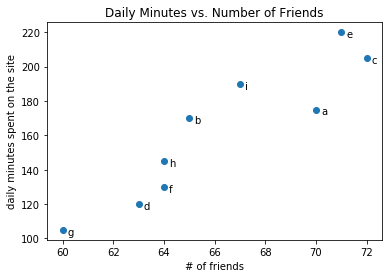

In [34]:
## Plotagem do grafico de dispersao de acordo com o livro

friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes) ##eixo x = friends /// eixo y = minutes

for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

### Cuidado ao deixa o matplot escolher a escala

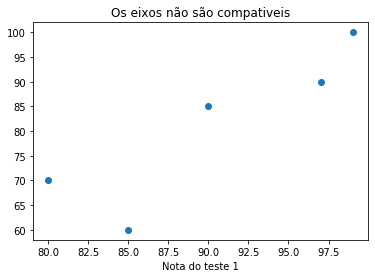

In [35]:
test_1_grade = [99, 90, 85, 97, 80]
test_2_grade = [100, 85, 60, 90, 70]

plt.scatter(test_1_grade, test_2_grade)
plt.title('Os eixos não são compativeis')
plt.xlabel("Nota do teste 2")
plt.xlabel("Nota do teste 1")

plt.show()

#### Exemplo II de gráfico de linhas (Não está no livro)

Documentação:
    matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)[source]

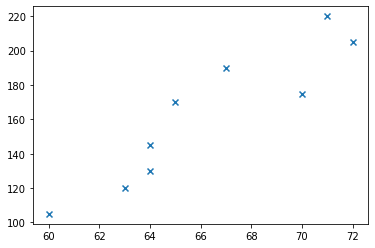

In [36]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]

plt.scatter(x = friends, y=minutes, marker = 'x')

#### <font color=SlateBlue size=5>CAPÍTULO 4 - ÁLGEBRA LINEAR </font>

***



                    Existe algo mais inútil ou menos útil que Álgebra? —Billy Connolly

                        Grus, Joel. Data Science do Zero (p. 71). Alta Books. Edição do Kindle. 

In [37]:
height_weight_age = [70, 170, 40]
grades = [95, 80, 75, 62]

In [38]:
## Soma elementos correpondentes

def vector_add(v, w):
    return [v_i + w_i
           for v_i, w_i in zip(v,w)]

## Subtrair dois vetores
def vector_subtract(v, w):
    return [v_i - w_i
           for v_i, w_i in zip(v, w)]

## Soma todos os elementos correspondentes
def vector_sum(vectors):
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    return result

def vector_sum(vectors):
    return reduce(vector_add, vectors)

from functools import partial
from functools import reduce

vector_sum = partial(reduce, vector_add)

#### <font color=ORANGE size=5> TERMINAR ESSE CAPITULO </font>

***



#### <font color=SlateBlue size=5>CAPÍTULO 5 - ESTATÍSTICA </font>

***



                        Os fatos são teimosos, mas as estatísticas são mais maleáveis. —Mark Twain

                                    Grus, Joel. Data Science do Zero (p. 81). Alta Books. Edição do Kindle. 

In [39]:
num_friends = [100, 49, 41, 40, 250, 0] ## Para uma quantidade pequena, ok mostrar os números através de uma lista
##porém, nao é possivel visualizar todos os numeros caso o dataset for de 1 milhao, por exemplo

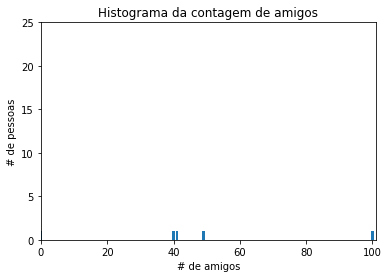

In [40]:
## com maior quantidade de dados (no caso deste exemplo, será 100 (range), os valores serao plotados em um grafico

## Definindo os numeros
friends_counts = Counter(num_friends)
xs = range(101)
ys = [friends_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0, 101, 0, 25])
plt.title('Histograma da contagem de amigos')
plt.xlabel('# de amigos')
plt.ylabel('# de pessoas')
plt.show()

## Grafico diferente do livro devido a lista 'num_friends'

In [41]:
import statistics

dados = [12, 4, 3, 6, 8, 10,2]
dados

[12, 4, 3, 6, 8, 10, 2]

In [42]:
statistics.median(dados)

6